<a href="https://colab.research.google.com/github/minzix/weather_people_relation_model/blob/main/final_model_in_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# CSV 파일 불러오기
data = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/baseline/test.csv')
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3123 non-null   object 
 1   Gu         3123 non-null   object 
 2   PM10       3123 non-null   float64
 3   PM2.5      3123 non-null   float64
 4   O3         3123 non-null   float64
 5   NO2        3123 non-null   float64
 6   CO         3123 non-null   float64
 7   SO2        3123 non-null   float64
 8   DailyRain  3123 non-null   float64
 9   VisitNum   3123 non-null   float64
dtypes: float64(8), object(2)
memory usage: 244.1+ KB


In [ ]:
data.shape

(3123, 12)

In [ ]:
data.columns

Index(['Date', 'Gu', 'PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain',
       'VisitNum'],
      dtype='object')

# EDA, Data Preprocessing

In [ ]:
quant_cols=['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain',
       'VisitNum']

In [ ]:
corr_df=pd.DataFrame(np.corrcoef(np.array(data[quant_cols]).T))

In [ ]:
corr_df.columns=quant_cols
corr_df.index = quant_cols

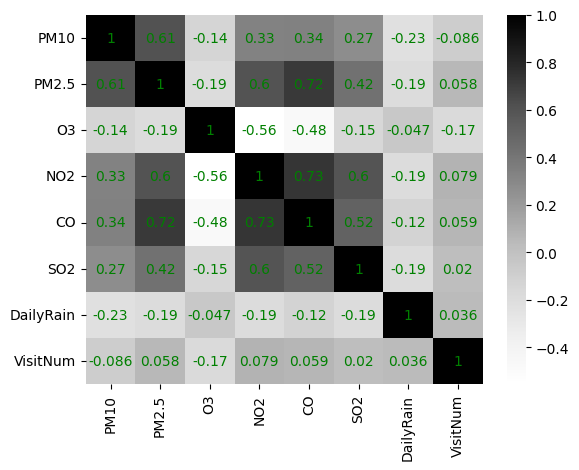

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_df.columns=quant_cols
corr_df.index = quant_cols

ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [ ]:
# # 미세먼지, 강우량, 유동인구수 heatmap
# quant_cols=['PM10', 'DailyRain', 'VisitNum']
# corr_df=pd.DataFrame(np.corrcoef(np.array(data[quant_cols]).T))
# corr_df.columns= quant_cols
# corr_df.index = quant_cols

# ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
# plt.show()
# ->상관관계 너무 낮아서 뺌

In [ ]:
# 'Date' 컬럼에서 'year'와 'month' 추출하여 문자열로 변환
data['year'] = pd.to_datetime(data['Date']).dt.strftime('%Y')
data['month'] = pd.to_datetime(data['Date']).dt.strftime('%m')
# data.head()

<Axes: xlabel='month', ylabel='PM10'>

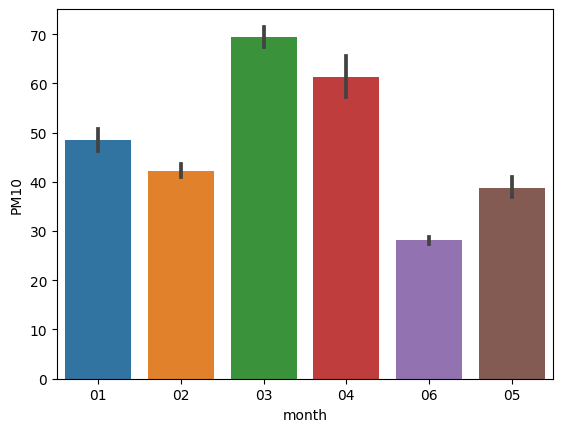

In [ ]:
import seaborn as sns
sns.barplot(x='month', y='PM10', data=data)

In [ ]:
# # Date로부터 ‘월’을 의미하는 month 정보를 피처로 추출합니다.
# data['month'] = data['Date'].apply(lambda x: x[:7])

# # 월별 거래 횟수를 계산하여 출력합니다.
# data['month'].value_counts()

In [ ]:
# # 미세먼지의 분포를 그래프로 탐색합니다.
# data['PM10'].hist(bins="auto")
# data['DailyRain'].hist(bins="auto")
# # data['VisitNum'].hist(bins="auto")

In [ ]:
data.head()

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2,DailyRain,VisitNum,year,month
0,2023-01-02,도봉구,21.0,10.0,0.0287,0.0130,0.38,0.0028,0.0,120956.0,2023,2023-01
1,2023-01-03,도봉구,26.0,15.0,0.0194,0.0259,0.54,0.0025,0.0,118727.0,2023,2023-01
2,2023-01-04,도봉구,28.0,20.0,0.0176,0.0333,0.62,0.0026,0.0,114711.0,2023,2023-01
3,2023-01-05,도봉구,45.0,33.0,0.0107,0.0445,0.80,0.0028,0.0,119399.0,2023,2023-01
4,2023-01-06,도봉구,66.0,54.0,0.0109,0.0453,0.88,0.0028,0.0,123182.0,2023,2023-01


count    173.000000
mean      18.052023
std       22.392707
min        1.000000
25%        2.000000
50%        7.000000
75%       28.000000
max       84.000000
Name: PM10, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7b538dcd3250>,
 'caps': [<matplotlib.lines.Line2D at 0x7b538db00b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b538db00490>],
 'medians': [<matplotlib.lines.Line2D at 0x7b538db01090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b538db01330>],
 'means': []}

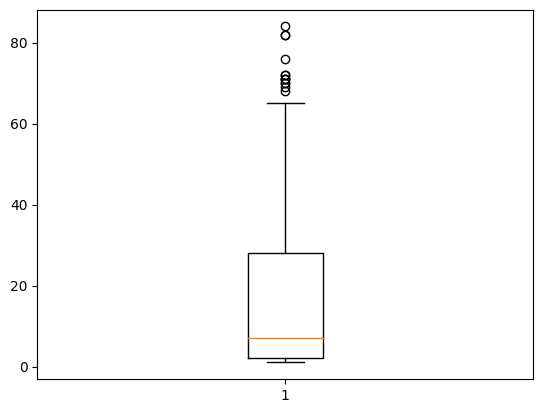

In [ ]:
# 월별 총 미세먼지 양을 집계합니다.
model_counts = data['PM10'].value_counts()
print(model_counts.describe())

# 기종별 총 거래 데이터 개수를 상자 그림으로 살펴봅니다.
plt.boxplot(model_counts)

<Axes: xlabel='PM10', ylabel='DailyRain'>

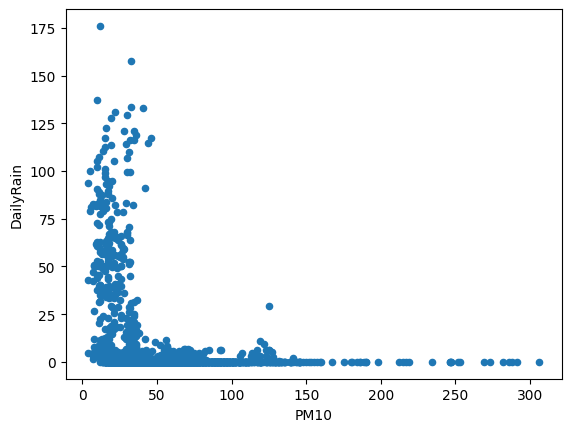

In [ ]:
# PM10와 DailyRain피처를 scatter plot으로 출력하여, 상관관계를 살펴봅니다.
data.plot.scatter(x='PM10', y='DailyRain')

<Axes: xlabel='PM10', ylabel='VisitNum'>

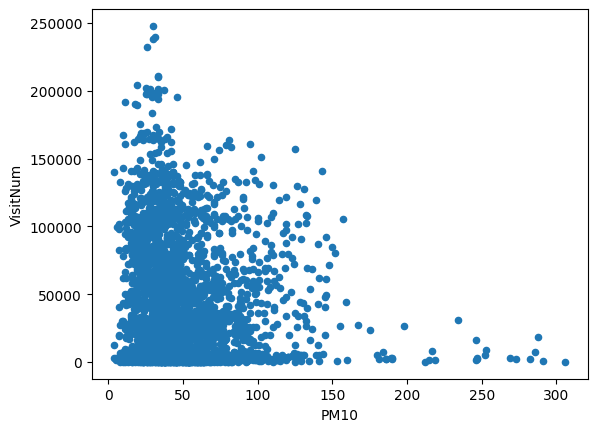

In [ ]:
data.plot.scatter(x='PM10', y='VisitNum')

<Axes: xlabel='DailyRain', ylabel='VisitNum'>

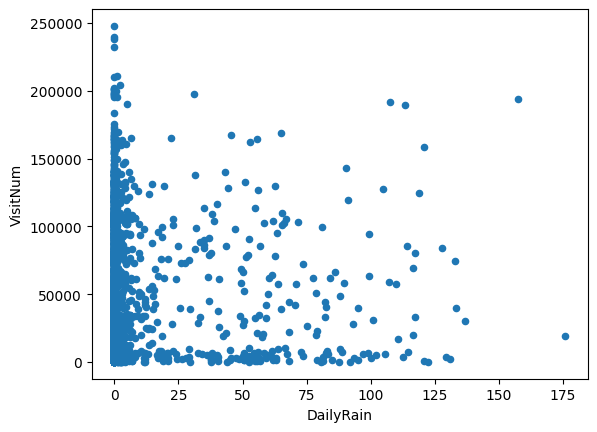

In [ ]:
data.plot.scatter(x='DailyRain', y='VisitNum')

In [ ]:
data2 = data.copy()

In [ ]:
# 'Gu' 컬럼 값들로 원핫인코딩
one_hot_encoded = pd.get_dummies(data2['Gu'])
data2 = pd.concat([data2, one_hot_encoded], axis=1)
data2

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2,DailyRain,VisitNum,...,서대문구,서초구,성동구,송파구,양천구,용산구,은평구,종로구,중구,중랑구
0,2023-01-02,도봉구,21.0,10.0,0.0287,0.0130,0.38,0.0028,0.0,120956.0,...,0,0,0,0,0,0,0,0,0,0
1,2023-01-03,도봉구,26.0,15.0,0.0194,0.0259,0.54,0.0025,0.0,118727.0,...,0,0,0,0,0,0,0,0,0,0
2,2023-01-04,도봉구,28.0,20.0,0.0176,0.0333,0.62,0.0026,0.0,114711.0,...,0,0,0,0,0,0,0,0,0,0
3,2023-01-05,도봉구,45.0,33.0,0.0107,0.0445,0.80,0.0028,0.0,119399.0,...,0,0,0,0,0,0,0,0,0,0
4,2023-01-06,도봉구,66.0,54.0,0.0109,0.0453,0.88,0.0028,0.0,123182.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,2023-06-26,중랑구,17.0,11.0,0.0277,0.0178,0.31,0.0022,65.0,39284.0,...,0,0,0,0,0,0,0,0,0,1
3119,2023-06-27,중랑구,37.0,11.0,0.0465,0.0174,0.32,0.0022,2.0,41083.0,...,0,0,0,0,0,0,0,0,0,1
3120,2023-06-28,중랑구,35.0,21.0,0.0473,0.0204,0.37,0.0023,0.0,41516.0,...,0,0,0,0,0,0,0,0,0,1
3121,2023-06-29,중랑구,33.0,22.0,0.0328,0.0198,0.31,0.0021,133.5,39480.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data2.columns

Index(['Date', 'Gu', 'PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain',
       'VisitNum', 'year', 'month', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동작구', '마포구', '서대문구', '서초구', '성동구', '송파구',
       '양천구', '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object')

In [ ]:
# 일별 유동인구 증가량 계산
data2['changeRate'] = 0  # 증감률 컬럼 초기화
for i in range(1, len(data2)):
  prev_visitor = data2.iloc[i-1, data2.columns.get_loc('VisitNum')]
  curr_visitor = data2.iloc[i, data2.columns.get_loc('VisitNum')]
  rate = (curr_visitor - prev_visitor) / prev_visitor
  if rate >= 50 :
    data2.iloc[i, data2.columns.get_loc('changeRate')] = 50
  else :
    data2.iloc[i, data2.columns.get_loc('changeRate')] = rate

<Axes: xlabel='DailyRain', ylabel='changeRate'>

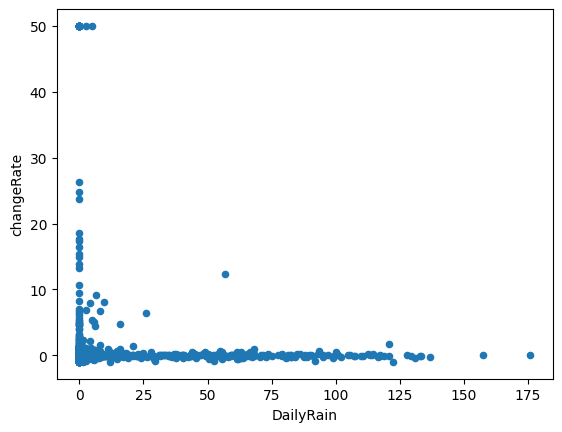

In [ ]:
# 유동인구증감률과 일일강우량 상관관계 -> 안넣는게 좋을듯...
data2.plot.scatter(x='DailyRain', y='changeRate')

<Axes: xlabel='DailyRain', ylabel='VisitNum'>

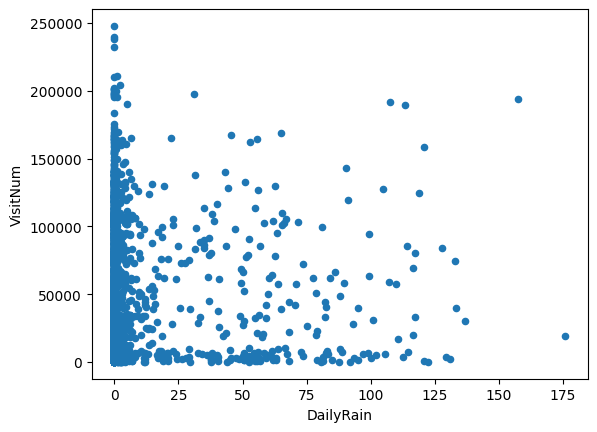

In [ ]:
data2.plot.scatter(x='DailyRain', y='VisitNum')

In [ ]:
#여러 열을 지정하여 각 행마다 그 열들의 평균을 구하려면?
#data_mean = data[['PM10',	'PM2.5',	'O3',	'NO2',	'CO',	'SO2']].mean(axis=1)
# data['total_pollution'] = data[['PM10',	'PM2.5',	'O3',	'NO2',	'CO',	'SO2']].mean(axis=1) #표에 추가

In [ ]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler()
# standardized_data = scaler.fit_transform(data2[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain', 'changeRate','VisitNum']])

# standardized_df = pd.DataFrame(standardized_data, columns=['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain', 'changeRate', 'VisitNum'])

In [ ]:
len(['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동작구', '마포구', '서대문구', '서초구', '성동구', '송파구',
       '양천구', '용산구', '은평구', '종로구', '중구', '중랑구'])

29

In [ ]:
from sklearn.model_selection import train_test_split

def load_and_split_data(data, test_size=0.2, random_state=42):

    # 특성 변수 (X)와 타깃 변수 (y)를 분리
    X = data[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동작구', '마포구', '서대문구', '서초구', '성동구', '송파구',
       '양천구', '용산구', '은평구', '종로구', '중구', '중랑구']]
    y = data['VisitNum']

    # 데이터셋을 train, val, test로 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 데이터를 학습/테스트용 데이터로 분리합니다.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #깃허브에서는 사이즈를 0.3으로 둠 validation을 안 한듯
# 증감률 추가
X_train, X_val, X_test, y_train, y_val, y_test = load_and_split_data(data2)
## X = df.loc[:, df.columns != 'price']

In [ ]:
ols_regr = LinearRegression()
ols_regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
ols_regr.fit(X_train, y_train)
y_train_pred = ols_regr.predict(X_train)
y_test_pred = ols_regr.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 948129894.866, test: 907239844.121
R^2 train: 0.521, test: 0.542


In [ ]:
# 랜덤 포레스트 모델을 학습합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error', max_features=4, n_jobs=-1,random_state=0) #깃허브에서는 criterion='mse'로 둠 -> 이러니까 오류떠서 수정함
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 98977697.667, test: 742897232.085
R^2 train: 0.950, test: 0.625


[('O3', 0.11786924233012586),
 ('PM10', 0.09072102651332639),
 ('동작구', 0.0894557750293513),
 ('NO2', 0.0806142687431887),
 ('CO', 0.07352509875897363),
 ('PM2.5', 0.06926662054906883),
 ('구로구', 0.06385088253808488),
 ('SO2', 0.06375606157963319),
 ('강남구', 0.04632110726369),
 ('용산구', 0.03738891588910703)]

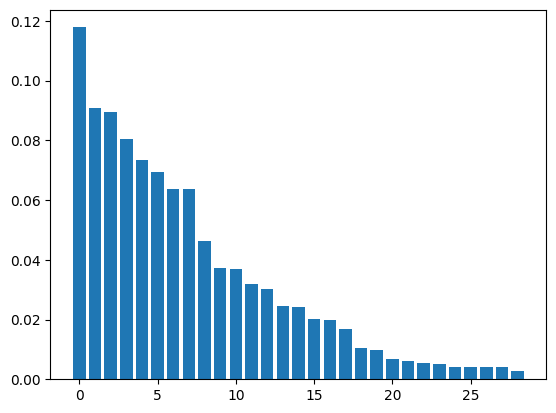

In [ ]:
# 학습한 모델의 피처 중요도를 그래프로 살펴봅니다.
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
X = data2[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동작구', '마포구', '서대문구', '서초구', '성동구', '송파구',
       '양천구', '용산구', '은평구', '종로구', '중구', '중랑구']]
plt.bar(range(X.shape[1]), importances[indices])

# 학습한 모델의 피처 중요도를 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

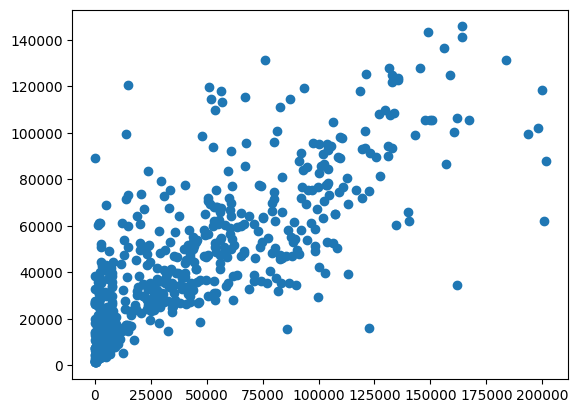

In [ ]:
# 테스트 데이터의 y값과, 예측된 y값을 scatter plot을 활용하여 상관관계를 살펴봅니다.
plt.scatter(y_test.values, y_test_pred)

### [최적의 모델 파라미터 찾기]

In [ ]:
# 시간적인 면에서의 효율을 위해 랜덤서치사용함
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search로 찾아낼 파라미터 후보군을 각각 리스트로 선정합니다.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

# RandomizedSearchCV 오브젝트를 생성하여 모델을 정의합니다.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
forest = RandomForestRegressor()
optimal_forest = RandomizedSearchCV(estimator = forest,
                                    param_distributions = random_grid,
                                    n_iter = 100,
                                    cv = 3,
                                    verbose=2,
                                    random_state=42,
                                    n_jobs = -1)

# RandomizedSearchCV 모델을 학습합니다.
X = data2[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', 'DailyRain', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동작구', '마포구', '서대문구', '서초구', '성동구', '송파구',
       '양천구', '용산구', '은평구', '종로구', '중구', '중랑구']]
y = data['VisitNum']
optimal_forest.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
# 앞서 선정한 파라미터 후보군 중에서 가장 좋은 결과를 보인 파라미터의 조합을 출력합니다.
optimal_forest.best_params_

{'n_estimators': 400,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

MSE train: 90884176.887, test: 96661059.925
R^2 train: 0.954, test: 0.951


[('O3', 0.12334444461810702),
 ('동작구', 0.09497136833736732),
 ('PM10', 0.08625620327647791),
 ('NO2', 0.07831412436348828),
 ('CO', 0.06851405341897575),
 ('PM2.5', 0.06533404225459512),
 ('구로구', 0.06257632340157877),
 ('SO2', 0.056636701219002196),
 ('강남구', 0.044578747393474435),
 ('도봉구', 0.04205378709778581)]

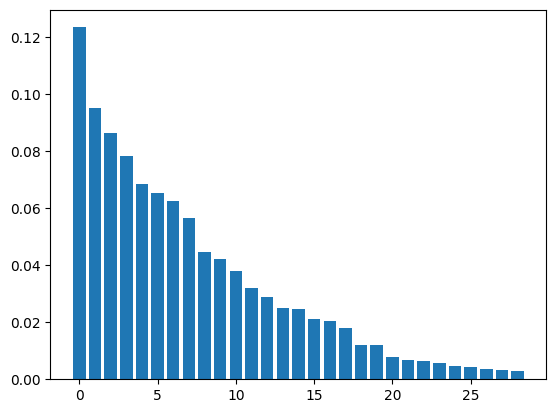

In [ ]:
# 최적의 파라미터를 적용한 모델로 유동인구 수를 예측하고 평가합니다.
y_train_pred = optimal_forest.predict(X_train)
y_test_pred = optimal_forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 유동인구 예측 모델의 피처 중요도 plot을 출력합니다.
importances = optimal_forest.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

# 유동인구 예측 모델의 피처 중요도를 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, optimal_forest.best_estimator_.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

In [ ]:
print(optimal_forest.score(X,y)) # 이거랑
print(r2_score(y_test, y_test_pred)) # 이게 먼차이지? -> r2_score는 sklearn에서 제공하는 함수

0.9527372364721257
0.9512156529847846


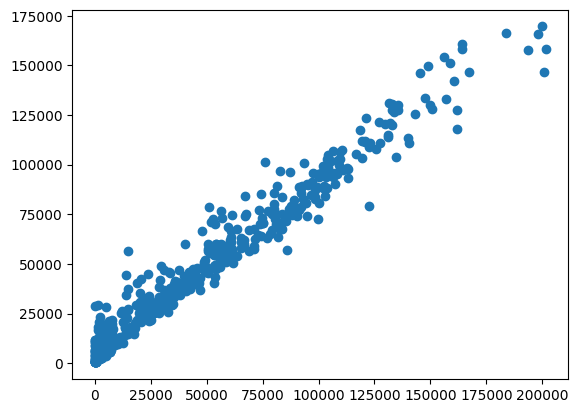

In [ ]:
# 테스트 데이터의 y값과, 예측된 y값을 scatter plot을 활용하여 상관관계를 살펴봅니다.
plt.scatter(y_test.values, y_test_pred)

In [ ]:
print(X.iloc[0]['PM10'])
X.iloc[0]['PM10'] = 25
print(X.iloc[0]['PM10'])
X

21.0
21.0


,PM10,PM2.5,O3,NO2,CO,SO2,DailyRain,강남구,강동구,강북구,...,서대문구,서초구,성동구,송파구,양천구,용산구,은평구,종로구,중구,중랑구
0,21.0,10.0,0.0287,0.0130,0.38,0.0028,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26.0,15.0,0.0194,0.0259,0.54,0.0025,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,20.0,0.0176,0.0333,0.62,0.0026,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.0,33.0,0.0107,0.0445,0.80,0.0028,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,66.0,54.0,0.0109,0.0453,0.88,0.0028,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17.0,11.0,0.0277,0.0178,0.31,0.0022,65.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3119,37.0,11.0,0.0465,0.0174,0.32,0.0022,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3120,35.0,21.0,0.0473,0.0204,0.37,0.0023,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3121,33.0,22.0,0.0328,0.0198,0.31,0.0021,133.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
column_means = X.mean().to_dict()
column_means

{'PM10': 47.946525776496955,
 'PM2.5': 22.991034261927634,
 'O3': 0.03278895292987512,
 'NO2': 0.02258181235991034,
 'CO': 0.47253602305475506,
 'SO2': 0.0029422350304194687,
 'DailyRain': 4.9193083573487035,
 '강남구': 0.05347422350304195,
 '강동구': 0.05187319884726225,
 '강북구': 0.04771053474223503,
 '강서구': 0.05315401857188601,
 '관악구': 0.05219340377841819,
 '광진구': 0.04707012487992315,
 '구로구': 0.03266090297790586,
 '금천구': 0.03202049311559398,
 '노원구': 0.03234069804674992,
 '도봉구': 0.0313800832532821,
 '동작구': 0.03234069804674992,
 '마포구': 0.052513608709574125,
 '서대문구': 0.044508485430675634,
 '서초구': 0.05155299391610631,
 '성동구': 0.05315401857188601,
 '송파구': 0.05347422350304195,
 '양천구': 0.052833813640730067,
 '용산구': 0.05315401857188601,
 '은평구': 0.04707012487992315,
 '종로구': 0.051232788984950366,
 '중구': 0.041626641050272174,
 '중랑구': 0.03266090297790586}

In [ ]:
first_row_dict = X.iloc[0].to_dict()
first_row_dict

{'PM10': 21.0,
 'PM2.5': 10.0,
 'O3': 0.0287,
 'NO2': 0.013,
 'CO': 0.38,
 'SO2': 0.0028,
 'DailyRain': 0.0,
 '강남구': 0.0,
 '강동구': 0.0,
 '강북구': 0.0,
 '강서구': 0.0,
 '관악구': 0.0,
 '광진구': 0.0,
 '구로구': 0.0,
 '금천구': 0.0,
 '노원구': 0.0,
 '도봉구': 1.0,
 '동작구': 0.0,
 '마포구': 0.0,
 '서대문구': 0.0,
 '서초구': 0.0,
 '성동구': 0.0,
 '송파구': 0.0,
 '양천구': 0.0,
 '용산구': 0.0,
 '은평구': 0.0,
 '종로구': 0.0,
 '중구': 0.0,
 '중랑구': 0.0}

In [ ]:
new_row

{'PM10': 55.0,
 'PM2.5': 22.991034261927634,
 'O3': 0.03278895292987512,
 'NO2': 0.02258181235991034,
 'CO': 0.47253602305475506,
 'SO2': 0.0029422350304194687,
 'DailyRain': 4.9193083573487035,
 '강남구': 0.0,
 '강동구': 0.0,
 '강북구': 0.0,
 '강서구': 0.0,
 '관악구': 0.0,
 '광진구': 0.0,
 '구로구': 0.0,
 '금천구': 0.0,
 '노원구': 0.0,
 '도봉구': 0.0,
 '동작구': 0.0,
 '마포구': 0.0,
 '서대문구': 0.0,
 '서초구': 0.0,
 '성동구': 0.0,
 '송파구': 0.0,
 '양천구': 0.0,
 '용산구': 1.0,
 '은평구': 0.0,
 '종로구': 0.0,
 '중구': 0.0,
 '중랑구': 0.0}

In [ ]:
new_row = {'PM10': 55.0,
 'PM2.5': 22.991034261927634,
 'O3': 0.03278895292987512,
 'NO2': 0.02258181235991034,
 'CO': 0.47253602305475506,
 'SO2': 0.0029422350304194687,
 'DailyRain': 4.9193083573487035,
 '강남구': 0.0,
 '강동구': 0.0,
 '강북구': 0.0,
 '강서구': 0.0,
 '관악구': 0.0,
 '광진구': 0.0,
 '구로구': 0.0,
 '금천구': 0.0,
 '노원구': 0.0,
 '도봉구': 0.0,
 '동작구': 0.0,
 '마포구': 0.0,
 '서대문구': 0.0,
 '서초구': 0.0,
 '성동구': 0.0,
 '송파구': 0.0,
 '양천구': 0.0,
 '용산구': 1.0,
 '은평구': 0.0,
 '종로구': 0.0,
 '중구': 0.0,
 '중랑구': 0.0}
X = X.append(new_row, ignore_index=True)

In [ ]:
# 최종 예측
print("오늘 용산구의 예상 유동인구는 " + str(int(optimal_forest.predict(X)[-1:][0])) + "명입니다")

오늘 용산구의 예상 유동인구는 39166명입니다


In [ ]:
# 튜닝
param_grid = {'n_estimators':[500,1000,1500,2000],
             'max_features':[2,4,6,8,10,12]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(forest,param_grid,cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=4, n_estimators=1000,
                                             n_jobs=-1, random_state=0),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [500, 1000, 1500, 2000]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 2000}

In [ ]:
# grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 95797688.761, test: 730019070.028
R^2 train: 0.952, test: 0.632


- 유동인구를 진짜 숫자가 아니라 비중으로()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

# # 데이터를 학습/테스트용 데이터로 분리합니다.
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #깃허브에서는 사이즈를 0.3으로 둠 validation을 안 한듯
# X_train, X_val, X_test, y_train, y_val, y_test = load_and_split_data(data)
# ## X = df.loc[:, df.columns != 'price']

# # 랜덤 포레스트 모델을 학습합니다.
# forest = RandomForestRegressor(n_estimators=1000,
#                                criterion='squared_error') #깃허브에서는 criterion='mse'로 둠 -> 이러니까 오류떠서 수정함
# forest.fit(X_train, y_train)
# y_train_pred = forest.predict(X_train)
# y_test_pred = forest.predict(X_test)

# # 학습한 모델을 평가합니다.
# print('MSE train: %.3f, test: %.3f' % (
#         mean_squared_error(y_train, y_train_pred),
#         mean_squared_error(y_test, y_test_pred)))
# print('R^2 train: %.3f, test: %.3f' % (
#         r2_score(y_train, y_train_pred),
#         r2_score(y_test, y_test_pred)))

MSE train: 322731094.954, test: 2475634624.179
R^2 train: 0.912, test: 0.140


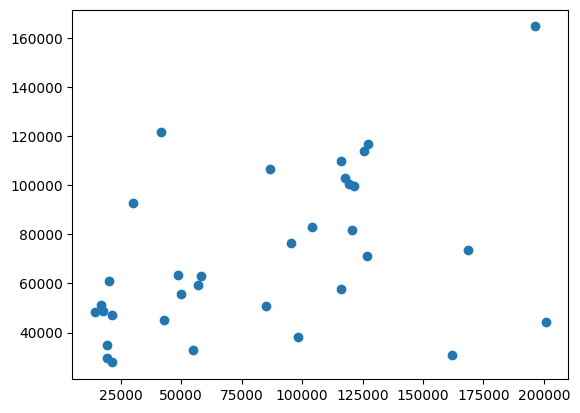

In [ ]:
plt.scatter(y_test.values, y_test_pred)

MSE train: 316784210.415, test: 2396000719.326
R^2 train: 0.913, test: 0.168

피처 중요도



[('Unnamed: 0', 0.24591439037351792),
 ('Gu', 0.23960676597985303),
 ('Date', 0.16250749932303366),
 ('PM2.5', 0.11990552776524659),
 ('O3', 0.10438287266166912),
 ('PM10', 0.08692337308391385),
 ('NO2', 0.04075957081276601)]

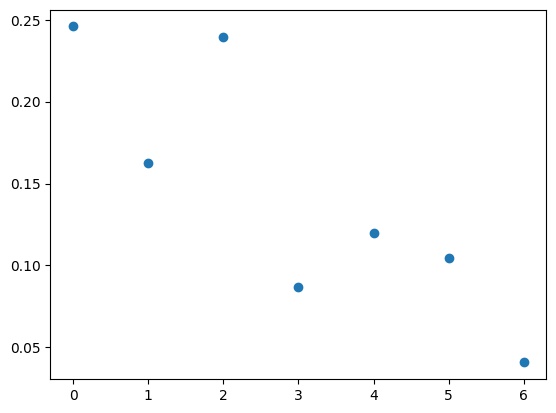

In [ ]:
# 랜덤 포레스트 모델을 학습하고 평가합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 피처 중요도 plot을 출력합니다.
importances = forest.feature_importances_
plt.plot(importances, "o")

# 피처 중요도를 print로 출력합니다.
print("\n피처 중요도")
feat_labels = data.columns.tolist() # 깃허브에서는 X.columns로 사용함, 'feat_labels' 변수는 'X' DataFrame의 열 이름을 리스트로 저장
# 'X'는 데이터의 입력 피처를 포함하는 DataFrame
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

# MSE: 작을수록 굳
# R^2 (0 ~ 1): 1에 가까울수록 굳

ValueError: ignored

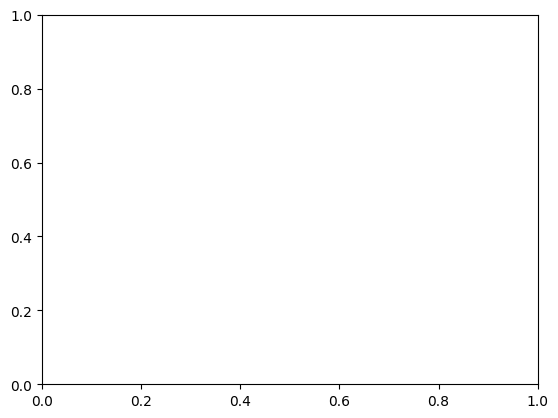

In [ ]:
# 학습한 모델의 피처 중요도를 그래프로 살펴봅니다.
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(data.shape[1]), importances[indices])

# 학습한 모델의 피처 중요도를 출력합니다.
feat_labels = data.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

In [ ]:
"오늘 용산구의 예상 유동인구는 n명입니다"

'오늘 용산구의 예상 유동인구는 n명입니다'